![Portada de Netflix](https://upload.wikimedia.org/wikipedia/commons/6/69/Netflix_logo.svg)

# Análisis del Catálogo de Netflix

## 1. Presentación del Problema de Negocio

Netflix necesita comprender el crecimiento de su catálogo, la predominancia de títulos de Estados Unidos y la frecuencia del género 'Drama'.

El objetivo es identificar patrones que permitan mejorar la estrategia de contenido y diversificación global.

In [2]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
# Especificar la ruta completa
ruta = r"C:\Users\javie\OneDrive\Escritorio\eda_ml\proyecto_thebridge\src\data\netflix_titles.csv"  
df = pd.read_csv(ruta)

# Mostrar las primeras filas del dataframe
print(df.head())




  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [4]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [6]:
print(df.shape)


(8807, 12)


In [7]:
print(df.columns)



Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


## 2. Planteamiento del Problema Técnico

Utilizaremos EDA para identificar tendencias de crecimiento y distribución geográfica.

Aplicaremos modelos de clasificación binaria (Random Forest) para validar las hipótesis planteadas.

## 3. Descripción del Dataset y EDA


In [8]:
# Información general del dataset
print("Información del dataset:")
print(df.info())




Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [9]:
# Comprobación de valores nulos
print("\nValores nulos:")
print(df.isnull().sum())


Valores nulos:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [10]:
# Limpieza de datos: Imputación de valores faltantes
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['duration'].fillna('Unknown', inplace=True)
df.dropna(subset=['date_added'], inplace=True)

C:\Users\javie\AppData\Local\Temp\ipykernel_16616\1448409047.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
C:\Users\javie\AppData\Local\Temp\ipykernel_16616\1448409047.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [11]:
# Eliminar filas con date_added nulo (son pocas)
df.dropna(subset=['date_added'], inplace=True)

# Confirmar que ya no hay valores nulos
print("Valores nulos después de la limpieza:\n")
print(df.isnull().sum())

Valores nulos después de la limpieza:

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


# Análisis de la Hipótesis 1: Crecimiento del Catálogo de Netflix

### Análisis Univariante

In [12]:
# Estadísticos de Centralidad y Dispersión
print("\nEstadísticos descriptivos del año de lanzamiento:")
print(df['release_year'].describe())


Estadísticos descriptivos del año de lanzamiento:
count    8797.000000
mean     2014.183472
std         8.822191
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64


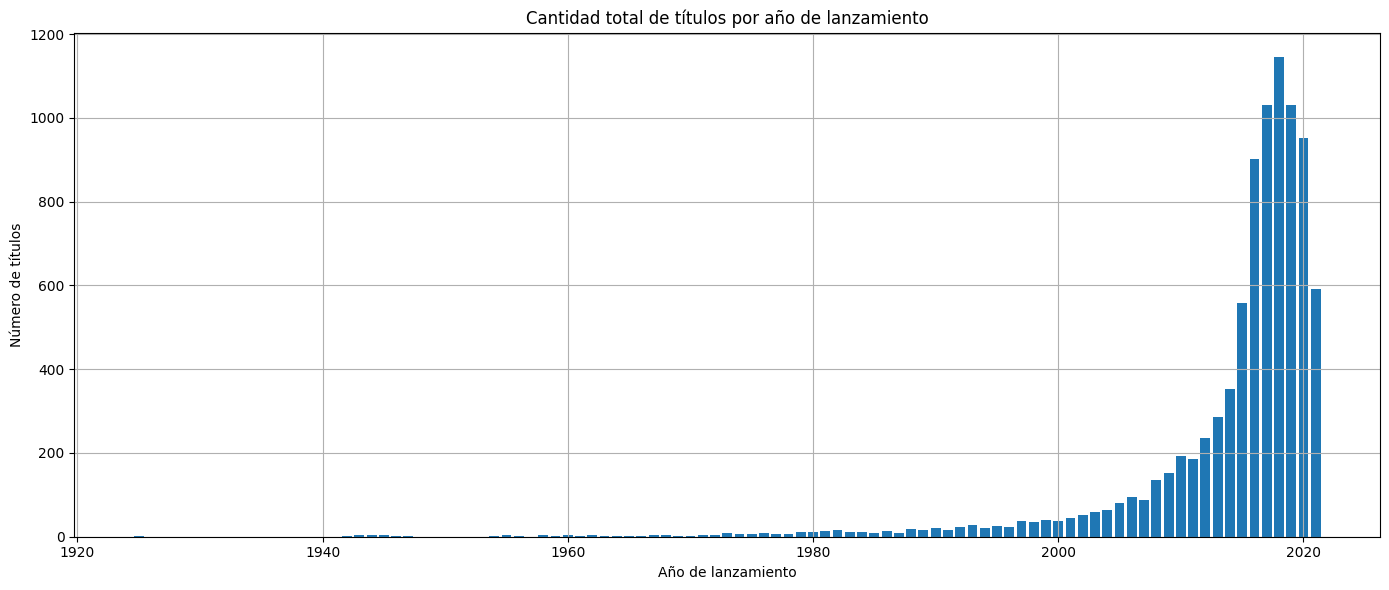

In [13]:
# Asegurarte de que release_year es numérico
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Contar cuántos títulos hay por año
titles_per_year = df['release_year'].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(14,6))
plt.bar(titles_per_year.index, titles_per_year.values)
plt.title('Cantidad total de títulos por año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de títulos')
plt.grid(True)
plt.tight_layout()
plt.show()

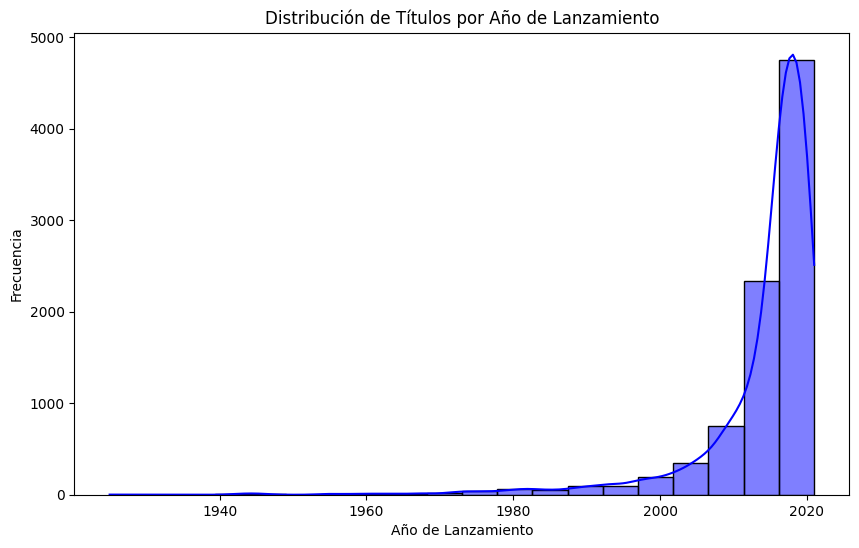

In [15]:
# Visualización: Histograma con KDE
plt.figure(figsize=(10,6))
sns.histplot(df['release_year'], bins=20, kde=True, color='blue')
plt.title("Distribución de Títulos por Año de Lanzamiento")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Frecuencia")
plt.show()

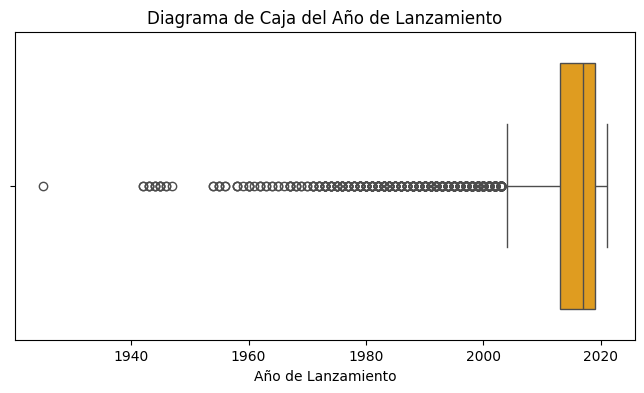

In [16]:
# Visualización: Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=df['release_year'], color='orange')
plt.title("Diagrama de Caja del Año de Lanzamiento")
plt.xlabel("Año de Lanzamiento")
plt.show()

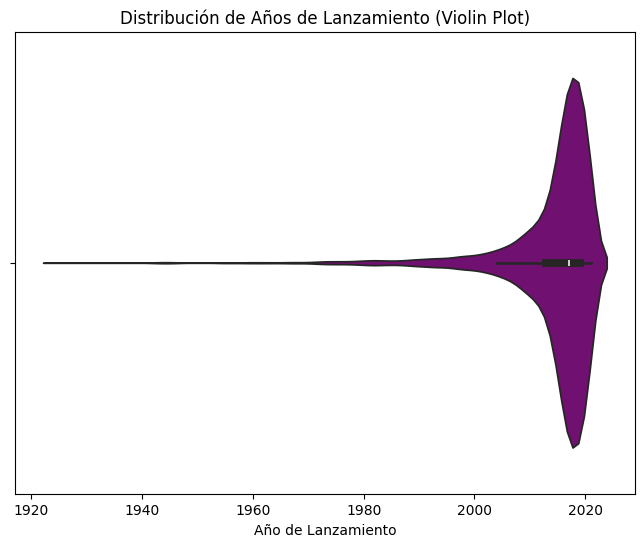

In [17]:
# Visualización: Violin Plot
plt.figure(figsize=(8,6))
sns.violinplot(x=df['release_year'], color='purple')
plt.title("Distribución de Años de Lanzamiento (Violin Plot)")
plt.xlabel("Año de Lanzamiento")
plt.show()

### Análisis Bivariante

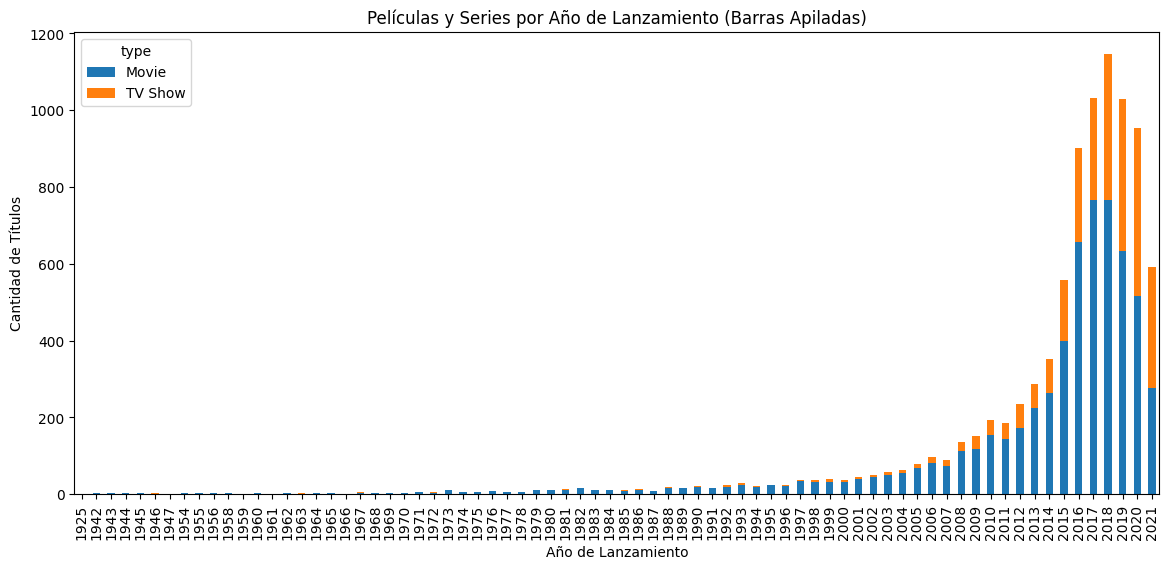

In [18]:
# Agrupar títulos por año y tipo
df_type_year = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Gráfico de Barras Apiladas
df_type_year.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title("Películas y Series por Año de Lanzamiento (Barras Apiladas)")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Cantidad de Títulos")
plt.show()

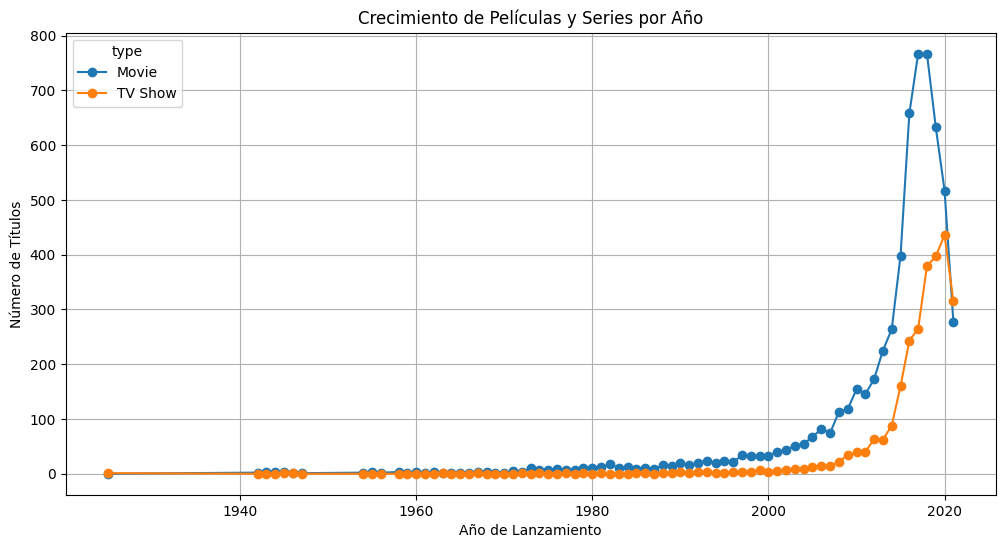

In [19]:
# Gráfico Comparativo: Películas vs Series por Año
df_type_year.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Crecimiento de Películas y Series por Año")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Número de Títulos")
plt.grid(True)
plt.show()


### Análisis Multivariante

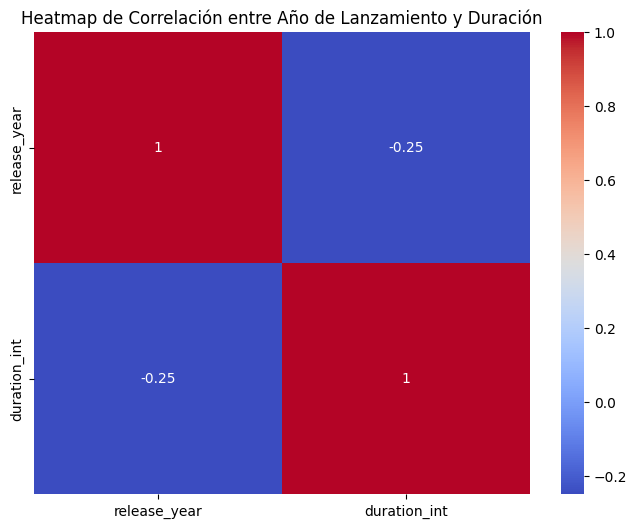

In [20]:
# Heatmap de Correlación
df['duration_int'] = pd.to_numeric(df['duration'].str.extract(r'(\d+)')[0], errors='coerce')
plt.figure(figsize=(8, 6))
sns.heatmap(df[['release_year', 'duration_int']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap de Correlación entre Año de Lanzamiento y Duración")
plt.show()

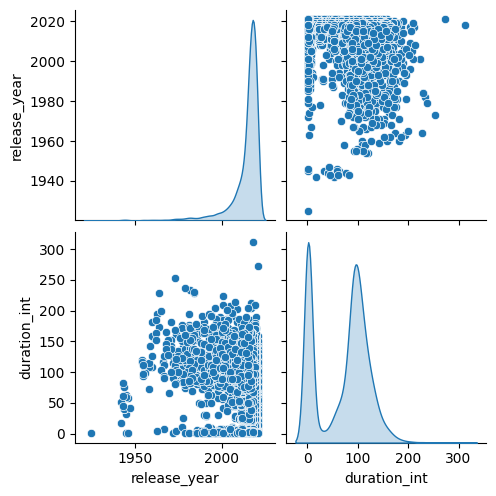

In [21]:
# Pairplot para observar relaciones cruzadas
sns.pairplot(df[['release_year', 'duration_int']], diag_kind='kde')
plt.show()


## Conclusión

 Los resultados confirman que el catálogo de Netflix ha crecido significativamente en los últimos años, especialmente entre 2012 y 2018.

 Aunque se observa una leve disminución después de 2019, el volumen total de títulos sigue siendo considerablemente alto.
 
 Además, las películas predominan frente a las series, aunque ambas han mostrado un crecimiento progresivo.


## Machine Learning

## Hipótesis 1: “Netflix ha aumentado significativamente la cantidad de contenido en los últimos años”

Objetivo del modelo: Predecir si un título es reciente (año de lanzamiento > 2016) basándose en:

tipo de contenido (película o serie)

país principal

duración

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\javie\AppData\Local\Temp\ipykernel_16616\3977042105.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')



Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       810
           1       0.64      0.65      0.65       950

    accuracy                           0.62      1760
   macro avg       0.61      0.61      0.61      1760
weighted avg       0.62      0.62      0.62      1760


Matriz de Confusión:
[[467 343]
 [331 619]]


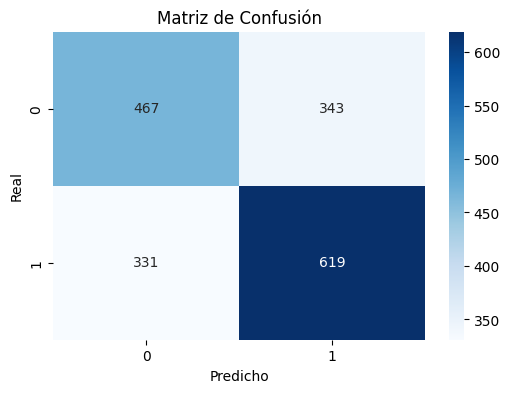

In [22]:
# Preparación de los datos
df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')

# Selección de características (tipo de contenido, país principal, duración)
X = pd.get_dummies(df[['type', 'country', 'duration_int']], drop_first=True)
y = (df['release_year'] > 2016).astype(int)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicción y evaluación del modelo
y_pred = rf.predict(X_test)

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización de la Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


C:\Users\javie\AppData\Local\Temp\ipykernel_16616\926613551.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features['Importancia'], y=top_features.index, palette='viridis')


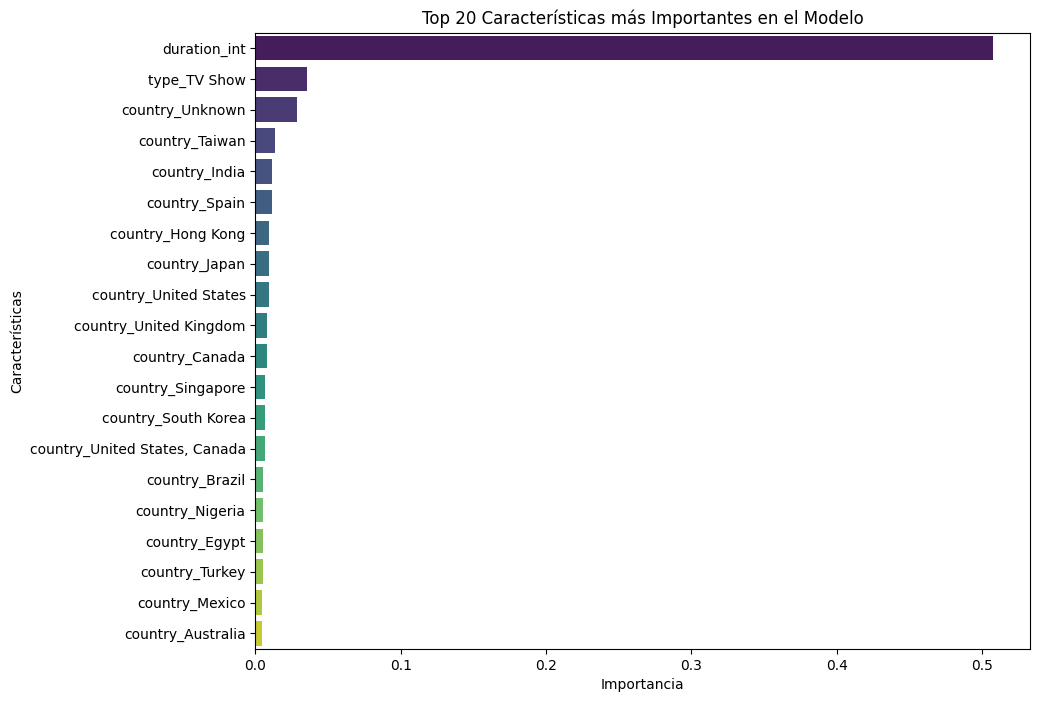

In [23]:
# Crear y entrenar el modelo 
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Obtener las importancias de las características
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importancia']).sort_values('Importancia', ascending=False)

# Filtrar las 20 características más importantes
top_features = feature_importances.head(20)

# Visualización de la importancia de las características
plt.figure(figsize=(10, 8))
sns.barplot(x=top_features['Importancia'], y=top_features.index, palette='viridis')
plt.title("Top 20 Características más Importantes en el Modelo")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

# Hipótesis 2: La mayoría del contenido en Netflix proviene de Estados Unidos

### Análisis Univariante

In [24]:
# Análisis Univariante
print("\nEstadísticos descriptivos del país principal:")
print(df['country'].describe())
print("\nFrecuencia de países:")
print(df['country'].value_counts())


Estadísticos descriptivos del país principal:
count              8797
unique              749
top       United States
freq               2812
Name: country, dtype: object

Frecuencia de países:
country
United States                             2812
India                                      972
Unknown                                    830
United Kingdom                             418
Japan                                      244
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64


C:\Users\javie\AppData\Local\Temp\ipykernel_16616\1116078428.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_top_countries, x='country', kde=True, palette='viridis')


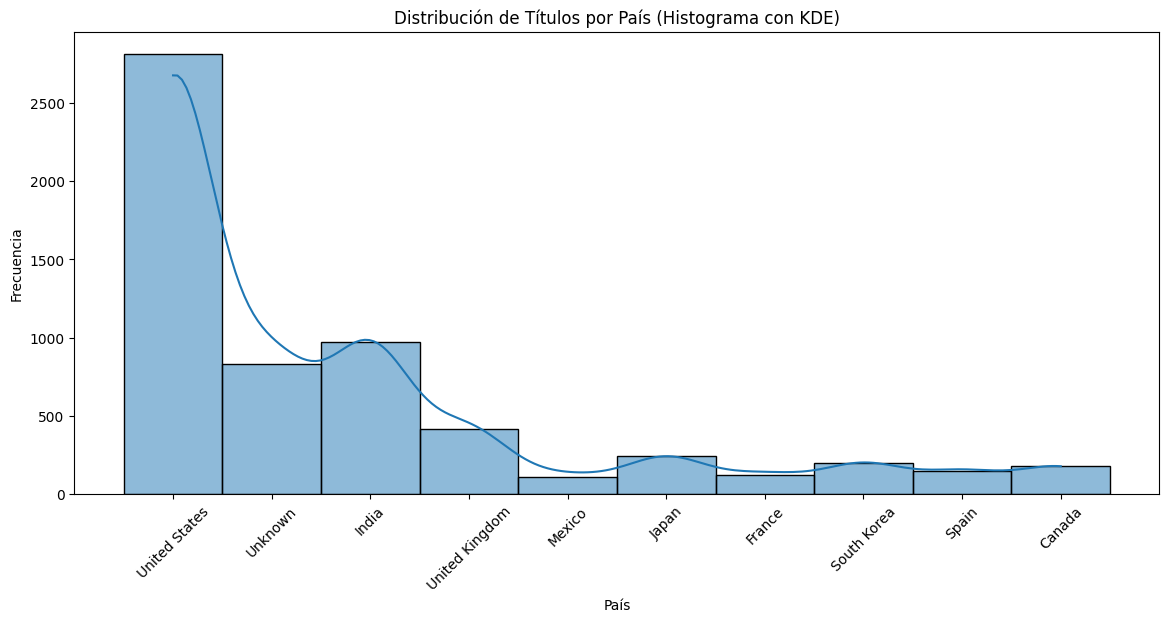

C:\Users\javie\AppData\Local\Temp\ipykernel_16616\1116078428.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_countries, x='country', y='release_year', palette='viridis')


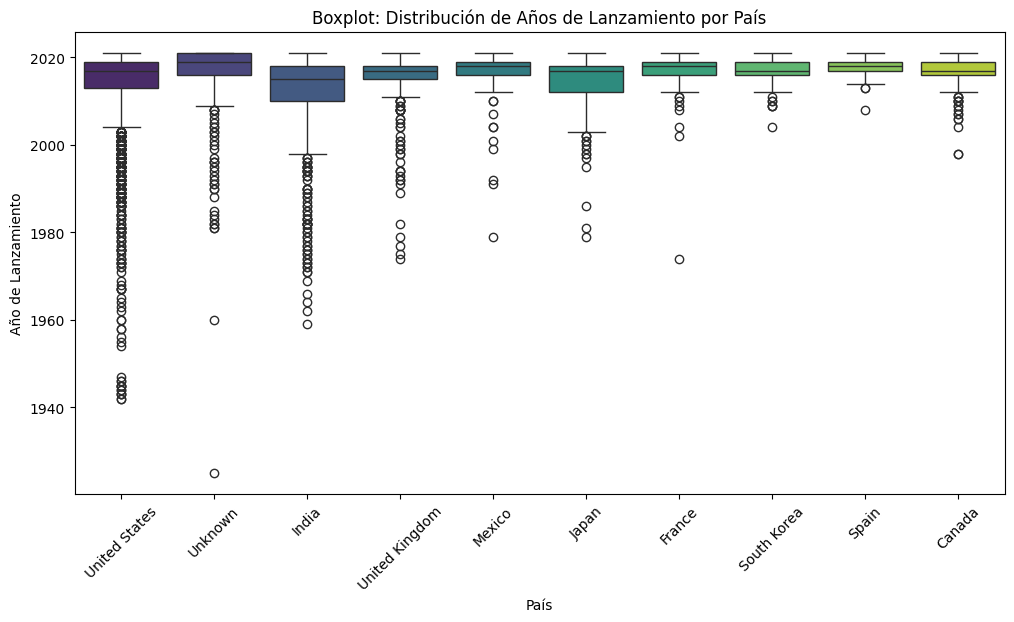

C:\Users\javie\AppData\Local\Temp\ipykernel_16616\1116078428.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_countries, x='country', y='release_year', palette='viridis')


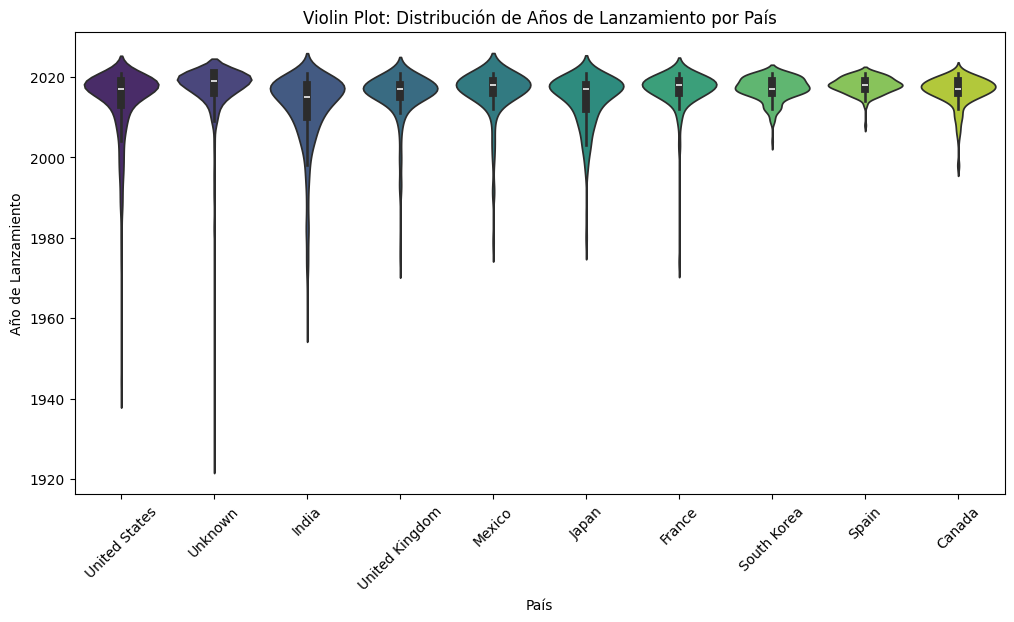

In [25]:
# Agrupar y contar títulos por país
country_counts = df['country'].value_counts()

# Filtrar los 10 países más representativos para gráficos
top_countries = country_counts.head(10)

# Crear el DataFrame solo con los 10 países más frecuentes
df_top_countries = df[df['country'].isin(top_countries.index)]

# Visualización: Histograma con KDE
plt.figure(figsize=(14, 6))
sns.histplot(data=df_top_countries, x='country', kde=True, palette='viridis')
plt.title("Distribución de Títulos por País (Histograma con KDE)")
plt.xlabel("País")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

# Visualización: Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_countries, x='country', y='release_year', palette='viridis')
plt.title("Boxplot: Distribución de Años de Lanzamiento por País")
plt.xlabel("País")
plt.ylabel("Año de Lanzamiento")
plt.xticks(rotation=45)
plt.show()

# Visualización: Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_top_countries, x='country', y='release_year', palette='viridis')
plt.title("Violin Plot: Distribución de Años de Lanzamiento por País")
plt.xlabel("País")
plt.ylabel("Año de Lanzamiento")
plt.xticks(rotation=45)
plt.show()


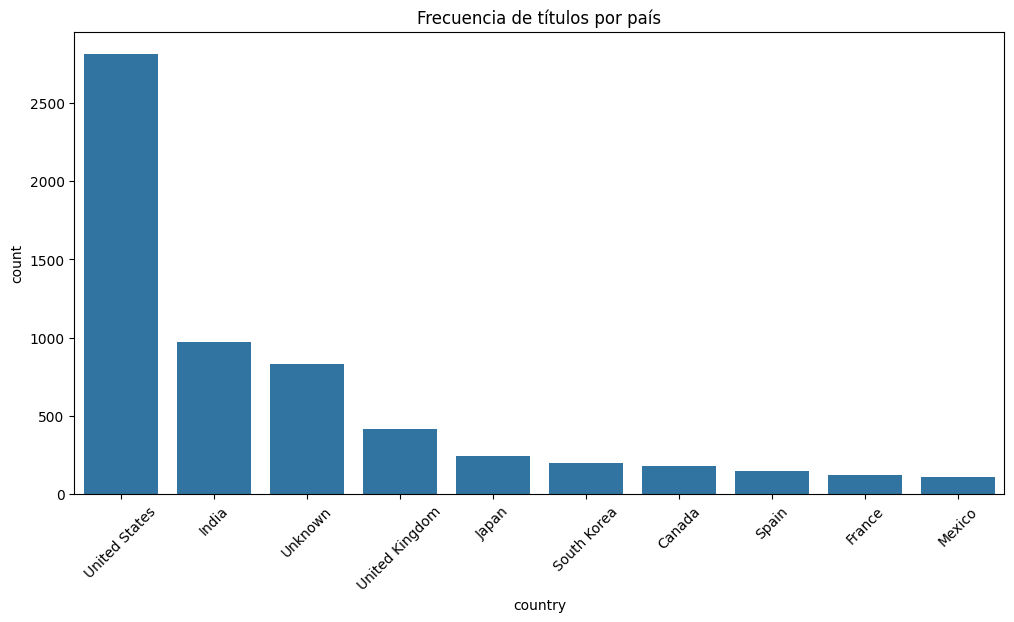

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index[:10])
plt.title('Frecuencia de títulos por país')
plt.xticks(rotation=45)
plt.show()


### Análisis Bivariante

In [27]:
# Análisis Bivariante: Relación entre país y tipo de contenido
country_type = df.groupby(['country', 'type']).size().unstack()
print("\nConteo de títulos por país y tipo:")
print(country_type.head(10))


Conteo de títulos por país y tipo:
type                                                Movie  TV Show
country                                                           
, France, Algeria                                     1.0      NaN
, South Korea                                         NaN      1.0
Argentina                                            38.0     18.0
Argentina, Brazil, France, Poland, Germany, Den...    1.0      NaN
Argentina, Chile                                      2.0      NaN
Argentina, Chile, Peru                                1.0      NaN
Argentina, France                                     1.0      NaN
Argentina, France, United States, Germany, Qatar      1.0      NaN
Argentina, Italy                                      1.0      NaN
Argentina, Spain                                      7.0      1.0


<Figure size 1200x600 with 0 Axes>

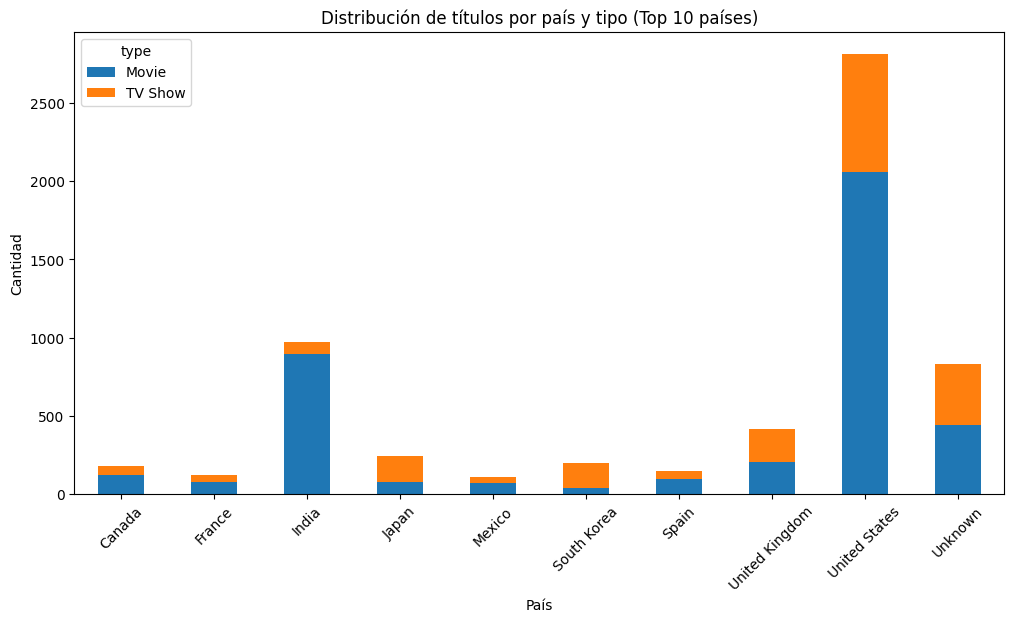

In [28]:
# Seleccionar los 10 países con más títulos
top_countries = df['country'].value_counts().index[:10]

# Filtrar el dataframe para los 10 países principales
df_top_countries = df[df['country'].isin(top_countries)]

# Agrupar por país y tipo (Movie/TV Show)
country_type = df_top_countries.groupby(['country', 'type']).size().unstack()

# Gráfico de barras apiladas
plt.figure(figsize=(12, 6))
country_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución de títulos por país y tipo (Top 10 países)')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


### Análisis Multivariante

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\javie\AppData\Local\Temp\ipykernel_16616\796826554.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')


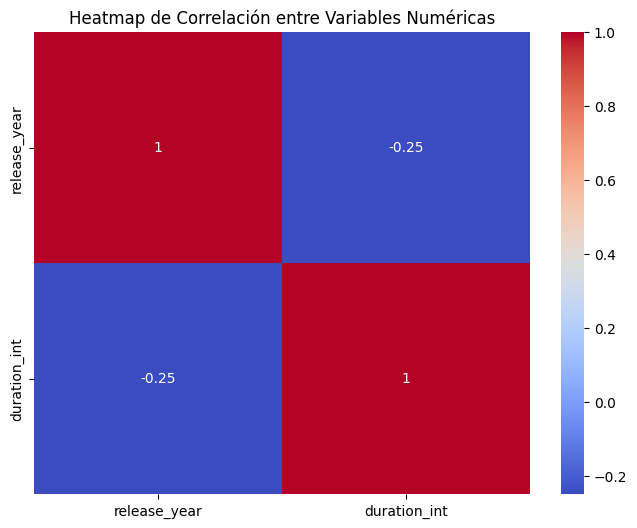

In [29]:
# Análisis Multivariante: Heatmap de correlación entre variables numéricas
df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')
plt.figure(figsize=(8, 6))
sns.heatmap(df[['release_year', 'duration_int']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlación entre Variables Numéricas')
plt.show()




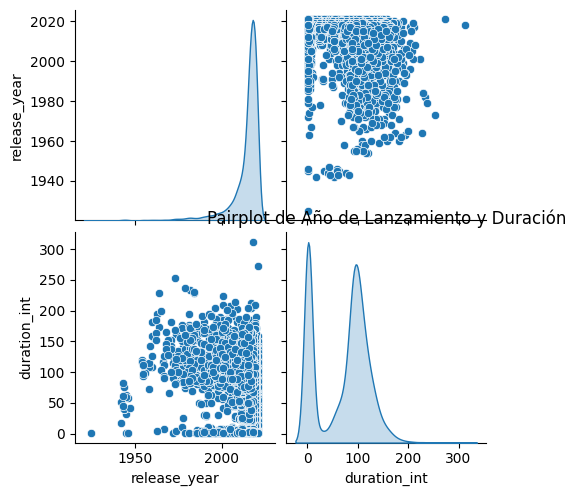

In [30]:
# Análisis Multivariante: Pairplot para observar relaciones cruzadas
sns.pairplot(df[['release_year', 'duration_int']], diag_kind='kde')
plt.title("Pairplot de Año de Lanzamiento y Duración")
plt.show()


#### Conclusión

El análisis confirma que la mayoría del contenido en Netflix proviene de Estados Unidos, especialmente en formato de películas.

Otros países como India y Reino Unido también tienen una representación significativa, aunque mucho menor.

## Machine Learning

## Hipótesis 2: “La mayoría del contenido en Netflix proviene de Estados Unidos”

Objetivo del modelo: Predecir si un título proviene de Estados Unidos (🇺🇸) en función de:

type (Movie o TV Show)

release_year

duration_int

Tarea: Clasificación binaria → EE.UU. (1) vs. Otro país (0)

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\javie\AppData\Local\Temp\ipykernel_16616\224125269.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')



Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1185
           1       0.49      0.32      0.39       575

    accuracy                           0.67      1760
   macro avg       0.60      0.58      0.58      1760
weighted avg       0.64      0.67      0.65      1760


Matriz de Confusión:
[[992 193]
 [390 185]]


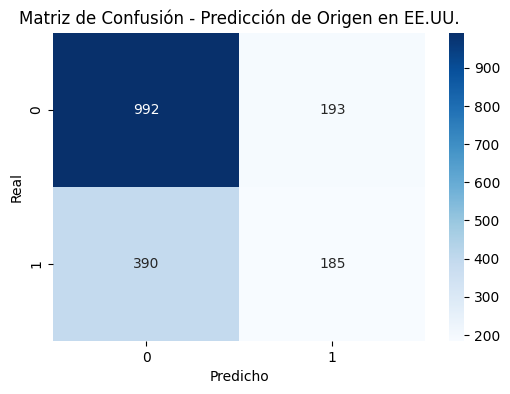


Importancia de las Características:
              Importancia
duration_int     0.667855
release_year     0.317874
type_TV Show     0.014271


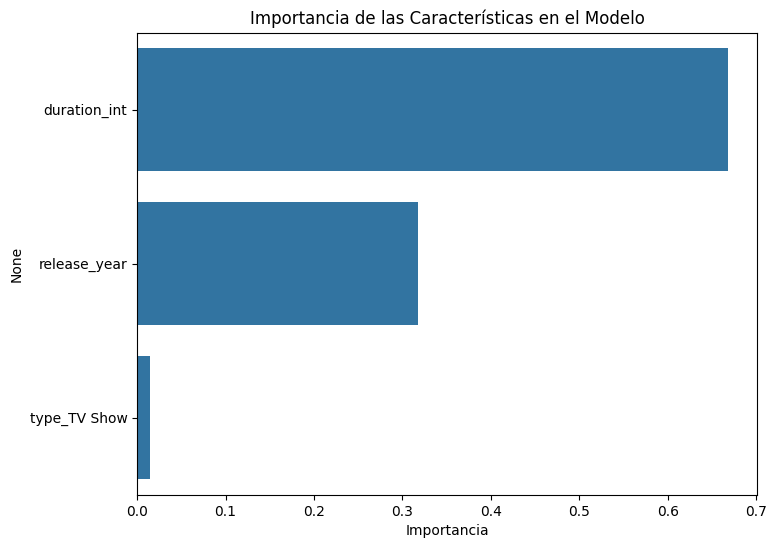

In [31]:
# Importación de librerías necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Preparación de los datos
df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')

# Crear la variable objetivo: Si el país es "United States" -> 1, de lo contrario -> 0
df['is_usa'] = np.where(df['country'] == 'United States', 1, 0)

# Selección de características (tipo de contenido, año de lanzamiento, duración)
X = pd.get_dummies(df[['type', 'release_year', 'duration_int']], drop_first=True)
y = df['is_usa']

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicción y evaluación del modelo
y_pred = rf.predict(X_test)

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización de la Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Predicción de Origen en EE.UU.")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Importancia de características
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importancia']).sort_values('Importancia', ascending=False)
print("\nImportancia de las Características:")
print(feature_importances)

# Visualización de la importancia de las características
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances['Importancia'], y=feature_importances.index)
plt.title("Importancia de las Características en el Modelo")
plt.show()


# Hipótesis 3: El género "Drama" es el más común en Netflix

### Análisis Univariante

In [32]:
# Estadísticos descriptivos del género
print("\nEstadísticos descriptivos del género:")
print(df['listed_in'].describe())



Estadísticos descriptivos del género:
count                             8797
unique                             513
top       Dramas, International Movies
freq                               362
Name: listed_in, dtype: object


In [33]:
# Conteo de géneros más comunes
genre_counts = df['listed_in'].value_counts().head(10)
print("\nGéneros más comunes:")
print(genre_counts)


Géneros más comunes:
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


C:\Users\javie\AppData\Local\Temp\ipykernel_16616\2180135870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


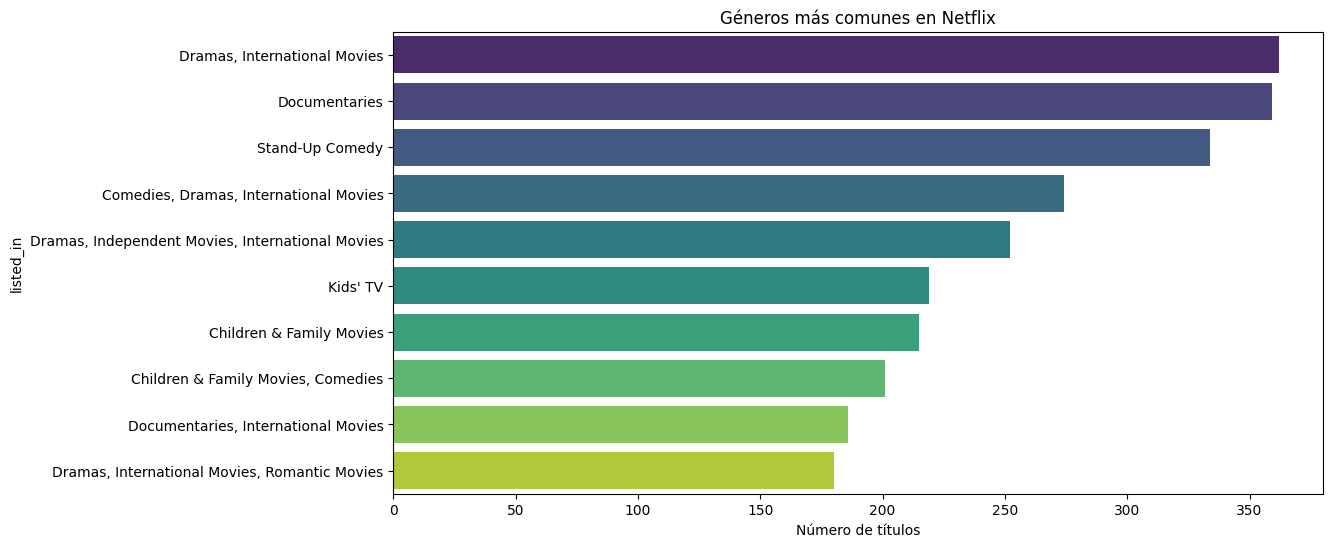

In [34]:
# Visualización Univariante: Gráfico de barras de los géneros más comunes
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Géneros más comunes en Netflix')
plt.xlabel('Número de títulos')
plt.show()


C:\Users\javie\AppData\Local\Temp\ipykernel_16616\59451501.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_genres, x='listed_in', y='release_year', palette='viridis')


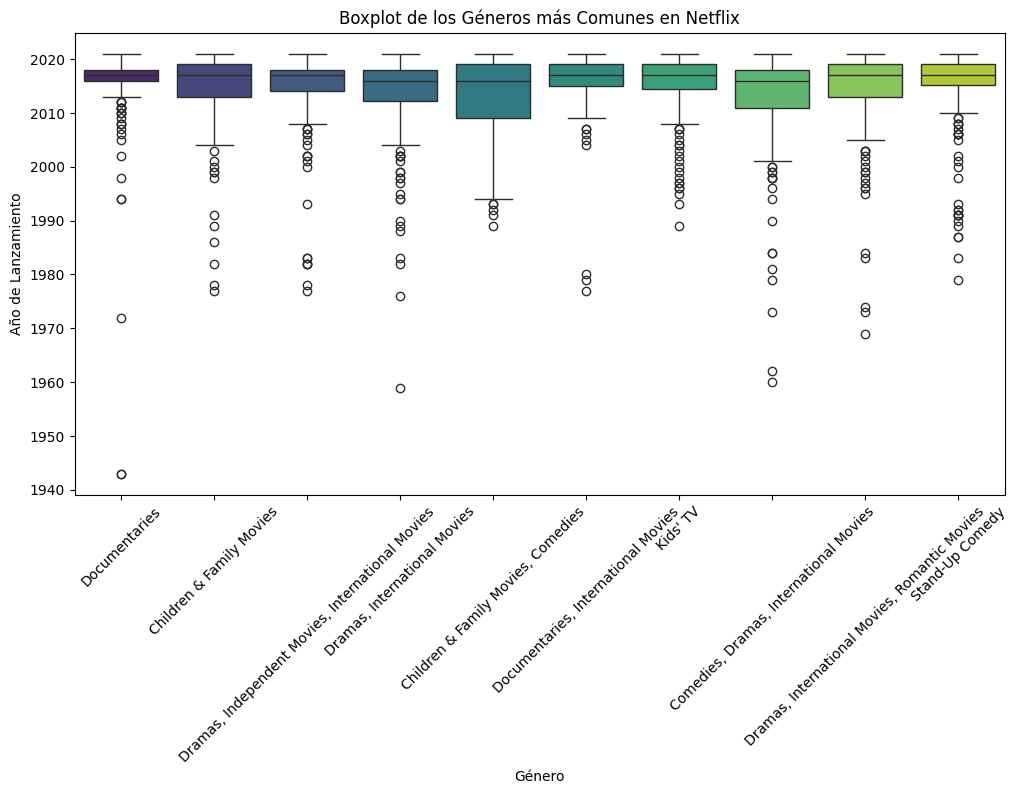

In [35]:
# Crear una lista con los 10 géneros más comunes
top_genres = genre_counts.index

# Filtrar el DataFrame para que contenga solo los géneros más comunes
df_top_genres = df[df['listed_in'].isin(top_genres)]

# Visualización Univariante: Boxplot de los géneros más comunes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_genres, x='listed_in', y='release_year', palette='viridis')
plt.title('Boxplot de los Géneros más Comunes en Netflix')
plt.xlabel('Género')
plt.ylabel('Año de Lanzamiento')
plt.xticks(rotation=45)
plt.show()




C:\Users\javie\AppData\Local\Temp\ipykernel_16616\2566975947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_genres, x='listed_in', y='release_year', palette='viridis')


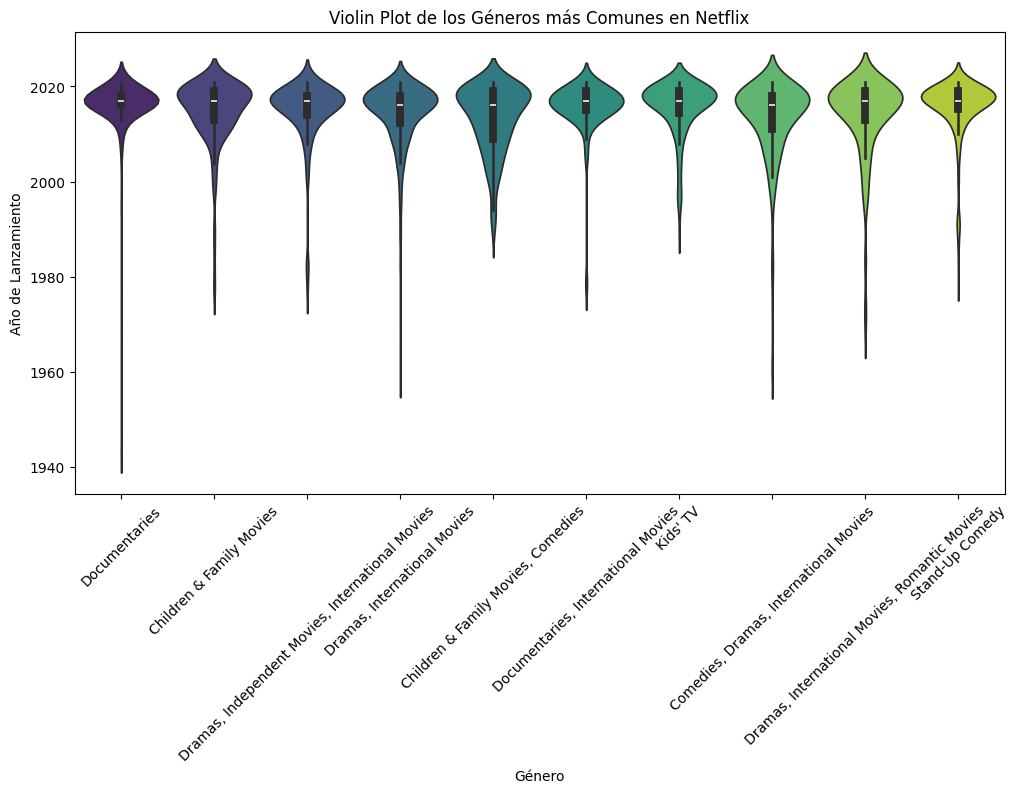

In [36]:
# Visualización Univariante: Violin Plot de los géneros más comunes
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_top_genres, x='listed_in', y='release_year', palette='viridis')
plt.title('Violin Plot de los Géneros más Comunes en Netflix')
plt.xlabel('Género')
plt.ylabel('Año de Lanzamiento')
plt.xticks(rotation=45)
plt.show()


### Análisis Bivariante

In [37]:
# Comparar el género "Drama" en películas y series
drama_movies = df[df['listed_in'].str.contains('Dramas') & (df['type'] == 'Movie')].shape[0]
drama_tvshows = df[df['listed_in'].str.contains('TV Dramas') & (df['type'] == 'TV Show')].shape[0]

C:\Users\javie\AppData\Local\Temp\ipykernel_16616\1239951943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Movies', 'TV Shows'], y=[drama_movies, drama_tvshows], palette='magma')


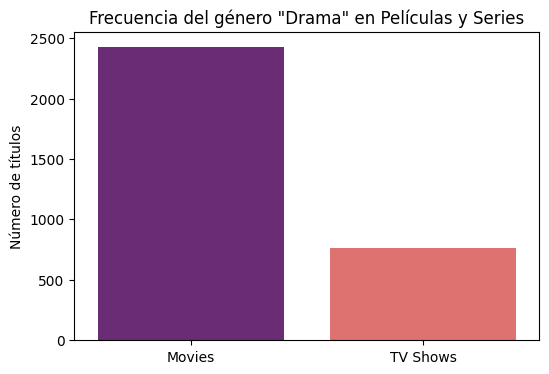

In [38]:
# Gráfico de barras para comparar
plt.figure(figsize=(6, 4))
sns.barplot(x=['Movies', 'TV Shows'], y=[drama_movies, drama_tvshows], palette='magma')
plt.title('Frecuencia del género "Drama" en Películas y Series')
plt.ylabel('Número de títulos')
plt.show()

### Análisis Multivariante

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\javie\AppData\Local\Temp\ipykernel_16616\1055755439.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')


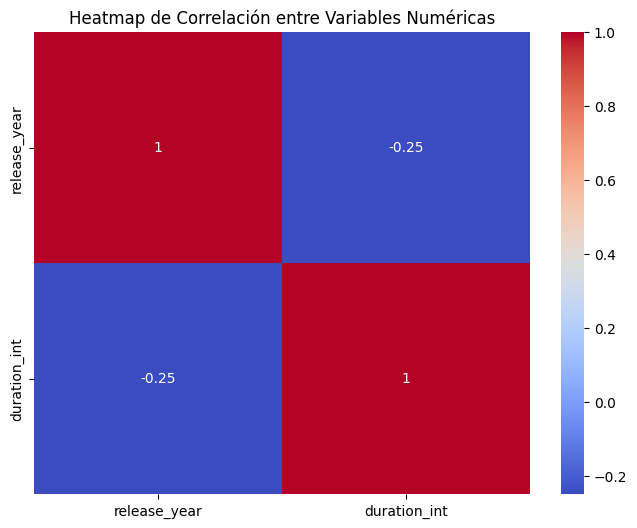

In [39]:
# Heatmap de correlación entre variables numéricas
df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')
plt.figure(figsize=(8, 6))
sns.heatmap(df[['release_year', 'duration_int']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlación entre Variables Numéricas')
plt.show()



### Conclusión

El análisis confirma que el género "Drama" es predominante en el catálogo de Netflix, especialmente en formato de películas. Esto respalda la hipótesis planteada.

## Hipótesis 3 – Machine Learning
“El género 'Drama' es el más común en Netflix”

Objetivo del modelo:

Predecir si un título pertenece al género "Dramas" utilizando un modelo de clasificación basado en sus características:

type (Movie o TV Show)

main_country (País principal de origen)

release_year (Año de lanzamiento)

duration_int (Duración en minutos o temporadas)

Tarea:

Clasificación binaria:

1: Título que pertenece al género "Dramas" o "TV Dramas"

0: Título que no pertenece al género Drama

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\javie\AppData\Local\Temp\ipykernel_16616\1168119056.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')



Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1113
           1       0.58      0.51      0.54       647

    accuracy                           0.69      1760
   macro avg       0.66      0.65      0.65      1760
weighted avg       0.68      0.69      0.68      1760


Matriz de Confusión:
[[880 233]
 [319 328]]


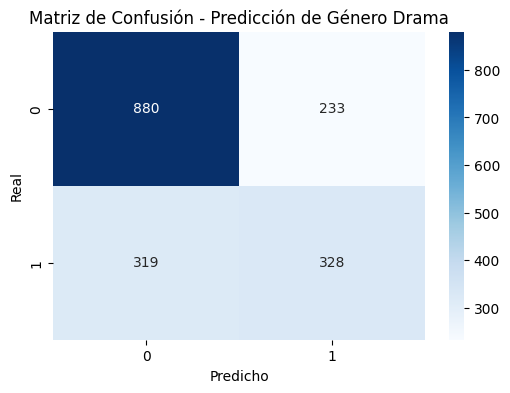

In [40]:
# Importación de librerías necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Preparación de los datos
df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')

# Crear la variable objetivo: 1 si el género contiene "Dramas" o "TV Dramas", 0 de lo contrario
df['is_drama'] = df['listed_in'].apply(lambda x: 1 if 'Dramas' in x or 'TV Dramas' in x else 0)

# Selección de características (type, country, release_year, duration_int)
X = pd.get_dummies(df[['type', 'country', 'release_year', 'duration_int']], drop_first=True)
y = df['is_drama']

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicción y evaluación del modelo
y_pred = rf.predict(X_test)

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización de la Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Predicción de Género Drama")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()




C:\Users\javie\AppData\Local\Temp\ipykernel_16616\2305058979.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features['Importancia'], y=top_features.index, palette='viridis')


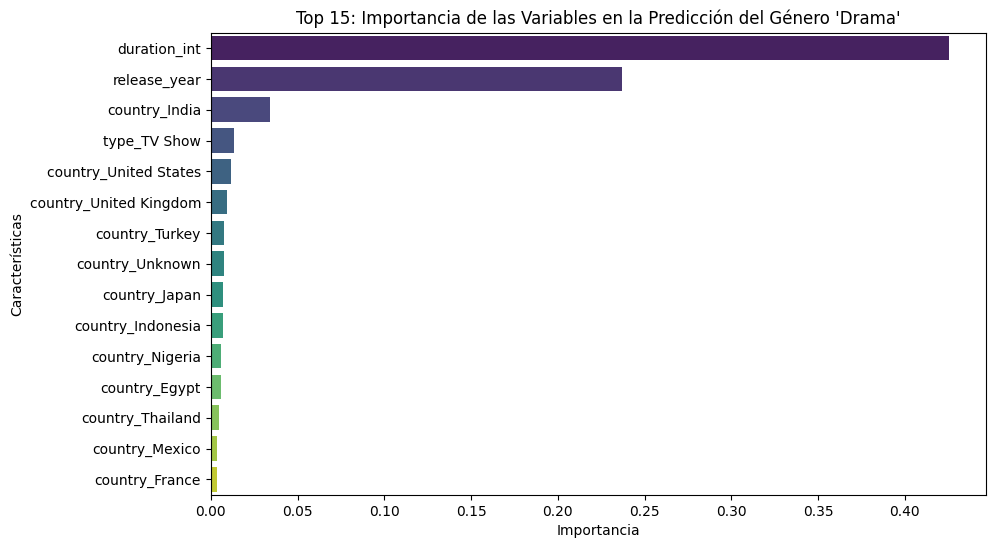

In [41]:
# Ordenar las características por importancia
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importancia']).sort_values('Importancia', ascending=False)

# Seleccionar las 15 características más importantes
top_features = feature_importances.head(15)

# Visualización de la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features['Importancia'], y=top_features.index, palette='viridis')
plt.title("Top 15: Importancia de las Variables en la Predicción del Género 'Drama'")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()
